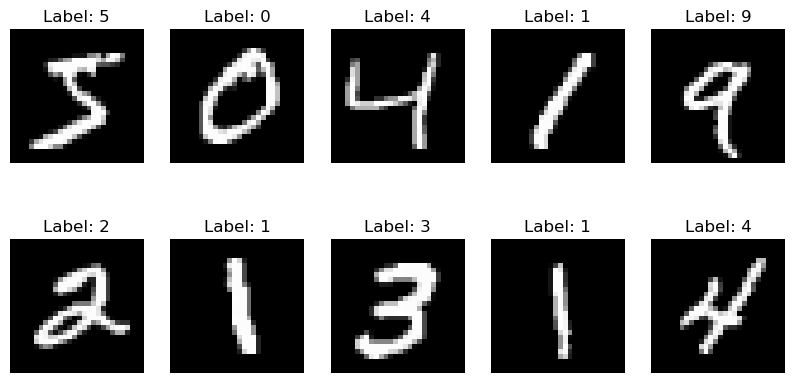

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Charger le dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalisation des pixels (valeurs entre 0 et 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Conversion des labels en one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Affichage de quelques images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Définition du modèle
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Transformer l'image 28x28 en un vecteur 1D
    Dense(128, activation='relu'),  # Première couche cachée avec 128 neurones
    Dense(64, activation='relu'),   # Deuxième couche cachée avec 64 neurones
    Dense(10, activation='softmax') # Couche de sortie pour 10 classes (chiffres 0-9)
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8807 - loss: 0.4204 - val_accuracy: 0.9627 - val_loss: 0.1205
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9671 - loss: 0.1062 - val_accuracy: 0.9716 - val_loss: 0.0902
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9793 - loss: 0.0682 - val_accuracy: 0.9770 - val_loss: 0.0783
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9846 - loss: 0.0478 - val_accuracy: 0.9779 - val_loss: 0.0731
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9873 - loss: 0.0393 - val_accuracy: 0.9766 - val_loss: 0.0748
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9903 - loss: 0.0294 - val_accuracy: 0.9801 - val_loss: 0.0773
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9919 - loss: 0.0243 - val_accuracy: 0.9804 - val_loss: 0.0749
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9928 - loss: 0.0212 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.9726 - loss: 0.1107
Test Accuracy: 0.9777
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


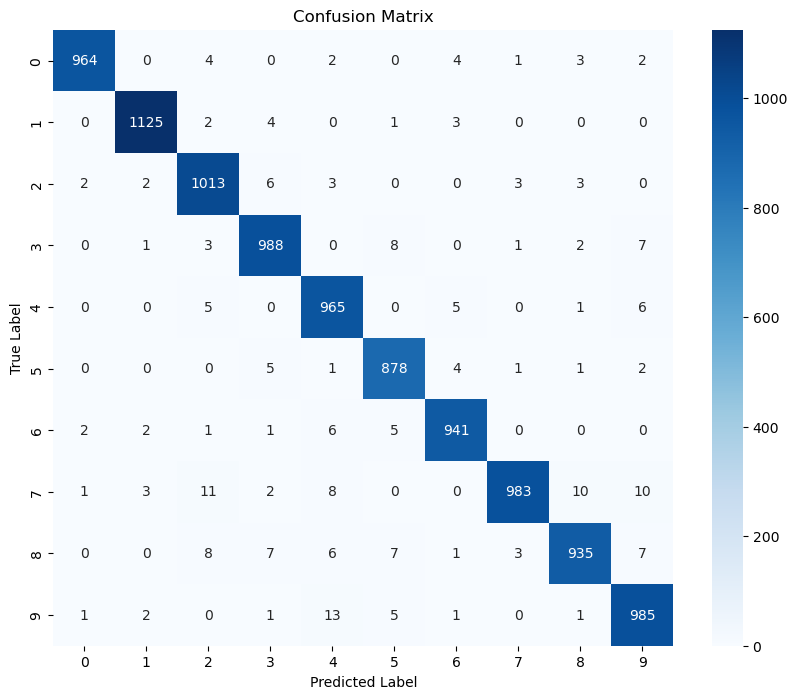

In [4]:
# Évaluation du modèle
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Prédictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Matrice de confusion
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()